<a href="https://colab.research.google.com/github/WahyuKhairi06/DeepLearning-WahyuKhairi-2311531009/blob/main/Praktikum%201/MLP_Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import library**

In [128]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# **1. Load dataset**

In [129]:
iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)


In [130]:
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [131]:
# Convert ke tensor
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)



# 2. Definisikan MLP

In [132]:
class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, output_dim)
        )
    def forward(self, x):
        return self.model(x)

# **3. Inisialisasi model**

In [133]:
model = MLP(4, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# **4. Training loop**

In [134]:
epochs = 100
loss_history = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.1861
Epoch [20/100], Loss: 0.0488
Epoch [30/100], Loss: 0.0352
Epoch [40/100], Loss: 0.0254
Epoch [50/100], Loss: 0.0145
Epoch [60/100], Loss: 0.0064
Epoch [70/100], Loss: 0.0024
Epoch [80/100], Loss: 0.0010
Epoch [90/100], Loss: 0.0006
Epoch [100/100], Loss: 0.0004


# **5. Evaluasi**

In [135]:
with torch.no_grad():
    y_pred = torch.argmax(model(X_test), dim=1)
    acc = accuracy_score(y_test, y_pred)

print("\n=== Evaluasi Model ===")
print(f"Akurasi Akhir: {acc:.4f}")


=== Evaluasi Model ===
Akurasi Akhir: 0.9667


# **6️. Visualisasi Loss**

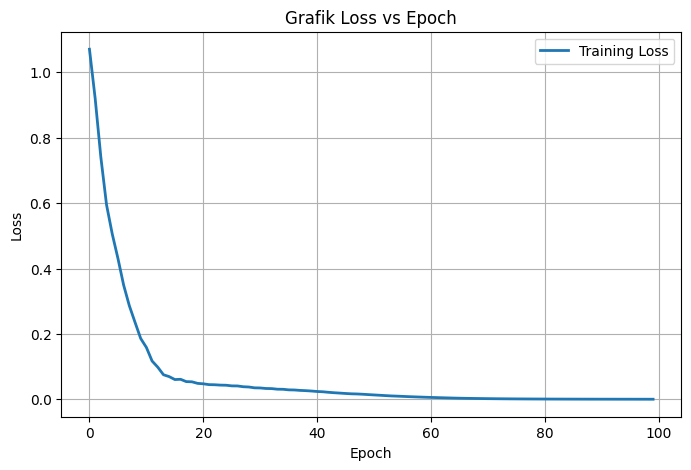

In [136]:
plt.figure(figsize=(8,5))
plt.plot(loss_history, label='Training Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Grafik Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# **7. Analisis Singkat**

In [137]:
print("\nAnalisis Hasil:")
print(f"- Model mencapai akurasi sekitar {acc:.2f}.")
print("- Loss cenderung menurun, menandakan model berhasil belajar.")
print("- Dengan arsitektur 128–64–32, model lebih kompleks dan bisa menangkap pola data lebih baik dibanding 64–32.")
print("- Jika overfitting terjadi (loss train turun tapi akurasi test stagnan), bisa dikurangi neuron atau tambahkan dropout.")


Analisis Hasil:
- Model mencapai akurasi sekitar 0.97.
- Loss cenderung menurun, menandakan model berhasil belajar.
- Dengan arsitektur 128–64–32, model lebih kompleks dan bisa menangkap pola data lebih baik dibanding 64–32.
- Jika overfitting terjadi (loss train turun tapi akurasi test stagnan), bisa dikurangi neuron atau tambahkan dropout.
